In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Importing Dataset for Text Classification

In [2]:
df_new = pd.read_csv("Vodaphone_review_dataset.csv")

df_new.head()

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment,Sentiment Label,Churn_Keyword,Churn,Review_Date,Review_Time,Weekday,Month,Review_Length,Word_Count
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,-0.020000,neutral,1,1,2025-06-05,22:03:24,Thursday,June,280,48
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0.700000,positive,0,0,2025-06-05,21:51:17,Thursday,June,68,13
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,-0.200000,neutral,0,1,2025-06-05,21:28:36,Thursday,June,154,34
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,0.275000,positive,0,1,2025-06-05,21:14:08,Thursday,June,240,44
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,-0.003634,neutral,1,1,2025-06-05,20:24:59,Thursday,June,1620,320


In [3]:
df_new = df_new[df_new['Clean_Review'].notna()]

In [4]:
df_new.Clean_Review.isnull().sum()

0

In [5]:
df_new.columns

Index(['Rating', 'Review', 'Name', 'Location', 'Date', 'Clean_Review',
       'Sentiment', 'Sentiment Label', 'Churn_Keyword', 'Churn', 'Review_Date',
       'Review_Time', 'Weekday', 'Month', 'Review_Length', 'Word_Count'],
      dtype='object')

In [6]:
df_new = df_new.drop(columns=['Sentiment', 'Sentiment Label', 'Churn_Keyword', 'Review',  'Review_Length', 'Word_Count'])

df_new.head()

,Rating,Name,Location,Date,Clean_Review,Churn,Review_Date,Review_Time,Weekday,Month
0,1,Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,1,2025-06-05,22:03:24,Thursday,June
1,5,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0,2025-06-05,21:51:17,Thursday,June
2,1,Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,1,2025-06-05,21:28:36,Thursday,June
3,1,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,1,2025-06-05,21:14:08,Thursday,June
4,1,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,1,2025-06-05,20:24:59,Thursday,June


In [7]:
df_new.columns

Index(['Rating', 'Name', 'Location', 'Date', 'Clean_Review', 'Churn',
       'Review_Date', 'Review_Time', 'Weekday', 'Month'],
      dtype='object')

In [8]:
df_new.isna().sum()

Rating          0
Name            2
Location        0
Date            0
Clean_Review    0
Churn           0
Review_Date     0
Review_Time     0
Weekday         0
Month           0
dtype: int64

## Word Cloud from Reviews

### 1. World Cloud for All Reviews

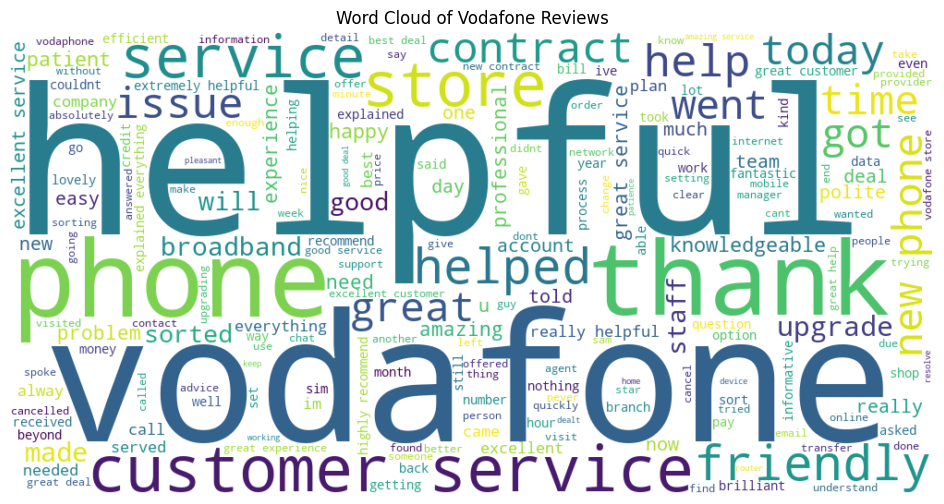

In [9]:
# Combining all text reviews into one string
all_reviews = " ".join(df_new['Clean_Review'].dropna())

# Generating the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Vodafone Reviews')
plt.show()

### 2. World Cloud for Churn Reviews 

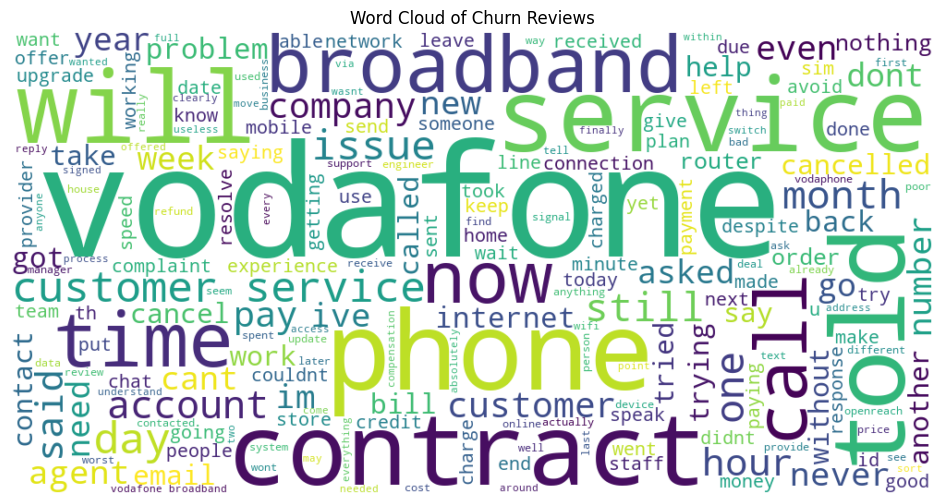

In [10]:
churn_reviews = " ".join(df_new[df_new['Churn'] == 1]['Clean_Review'].dropna())

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(churn_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Churn Reviews')
plt.show()


### TF-IDF Classification

In [11]:
# Importing necessary libraries for text classification

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [12]:
# Creating feature matrix and target vector

X = df_new['Clean_Review']
y = df_new['Churn']

In [13]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X.isna().sum()

0

In [15]:
# Vectorizing the text data using TF-IDF

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [16]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1728
           1       0.99      0.73      0.84       153

    accuracy                           0.98      1881
   macro avg       0.98      0.87      0.92      1881
weighted avg       0.98      0.98      0.98      1881



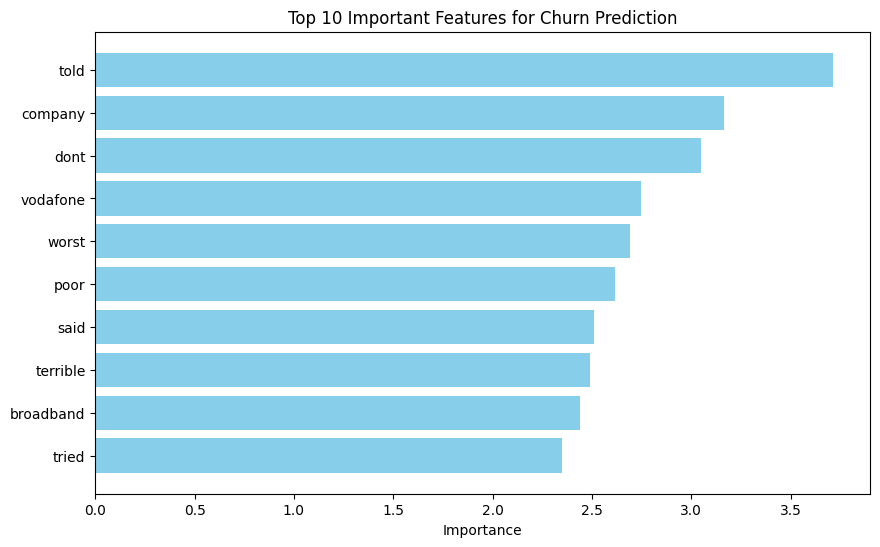

In [18]:
#Feature importance analysis

feature_names = vectorizer.get_feature_names_out()
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
top_features = feature_importance.head(10)      
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Important Features for Churn Prediction')
plt.gca().invert_yaxis()
plt.show()

In [19]:
# Handling class imbalance by using class weights

# Train with balanced class weights
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_balanced.fit(X_train_tfidf, y_train)

# Predict
y_pred_balanced = model_balanced.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred_balanced))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1728
           1       0.90      0.98      0.94       153

    accuracy                           0.99      1881
   macro avg       0.95      0.99      0.97      1881
weighted avg       0.99      0.99      0.99      1881



In [20]:
# Testing the model with a new reviews

#sample_reviews = df_new['Clean_Review'].sample(5, random_state=42).tolist()

sample_reviews = df_new['Clean_Review'].sample(5).tolist()



In [21]:
sample_reviews

['james was very helpfulit will not change my rating but you need to upgrade your system so your sales staff have a quicker system',
 'great experience so helpful got me the best deal',
 'i have tried times today to sign up to home broadband failing the credit check twice despite having an excellent credit score the final time over the phone requiring me to tell a complete stranger my bank account details wont provide me with a secure method to provide these details guess i wont be going with them then',
 'jays service was very good and he answered all my questions',
 'really great customer service in store today with andrew really informative disappointed to have been told about bonus and trade in but when going through with the contract this was removed due to the model of the trade in this however doesnt make a difference on customer service which was excellent']

In [22]:
# Transforming the sample reviews using the same vectorizer

X_test_reviews = vectorizer.transform(sample_reviews)


In [23]:
# Predicting churn for the sample reviews

predictions = model_balanced.predict(X_test_reviews)

for review, label in zip(sample_reviews, predictions):
    print(f"Review: {review}")
    print(f"Prediction: {'Churn' if label == 1 else 'No Churn'}")
    print("-" * 50)


Review: james was very helpfulit will not change my rating but you need to upgrade your system so your sales staff have a quicker system
Prediction: No Churn
--------------------------------------------------
Review: great experience so helpful got me the best deal
Prediction: No Churn
--------------------------------------------------
Review: i have tried times today to sign up to home broadband failing the credit check twice despite having an excellent credit score the final time over the phone requiring me to tell a complete stranger my bank account details wont provide me with a secure method to provide these details guess i wont be going with them then
Prediction: Churn
--------------------------------------------------
Review: jays service was very good and he answered all my questions
Prediction: No Churn
--------------------------------------------------
Review: really great customer service in store today with andrew really informative disappointed to have been told about bonu

In [24]:
best_model = model_balanced

import joblib
# Save the model and vectorizer
joblib.dump(best_model, 'vodafone_churn_model.joblib')
joblib.dump(vectorizer, 'vodafone_vectorizer.joblib')

['vodafone_vectorizer.joblib']